# WTI Price Prediction
This notebook will walkthrough my solution for predicting WTI prices on Friday, November 16th. Please see my EDA section to help understand my assumptions for the current model.

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from fbprophet import Prophet

In [115]:
xls= pd.ExcelFile("DCOILWTICO.xls")
df= xls.parse("FRED Graph")
df= df.iloc[10:]
df.columns= ['ds', 'y']
df['ds']= df['ds'].astype('datetime64[ns]')
df= df[df.y != 0]



In [116]:
df.dropna()
df.isnull().values.any()

False

In [117]:
#df['y_orig'] = df['y']
#log transform price
#df['y'] = pd.to_numeric(df['y'], errors = 'coerce')
#df['y']= np.log(df['y'])

# Fit model to FBProphet
FBProphet is a procedure for forecasting time series data at scale. It's based on an additive model where non-linear trends are fit with daily, monthly, yearly and holiday seasonality. Creating an accurate ARIMA model from scratch requires substantial experience with market knowledge, using FBProphet, I'm able to model daily changes in prices and accomodate the volatility in the market-- moreover, I can account for historical trends such as the 2008 market crash (although this data does not contain that). 
In sum, I chose this model because it provided me with both efficiency and accuracy given the time provided for this project.   

In [214]:
#Allow the model to fit at a daily level and increase malleability to volatility in the market
model = Prophet(daily_seasonality= True, seasonality_prior_scale= 10, changepoint_prior_scale= 5)
model.fit(df)

In [215]:
future_data = model.make_future_dataframe(periods= 60, freq='d')

In [216]:
forecast_data = model.predict(future_data)

In [217]:
forecast_data[['ds', 'yhat','yhat_lower','yhat_upper']].tail(n=10)

ds       yhat  yhat_lower  yhat_upper
1309 2018-12-26  75.928838   70.963765   81.079800
1310 2018-12-27  75.891986   70.685119   81.006115
1311 2018-12-28  75.857700   70.331782   81.203300
1312 2018-12-29  74.445105   68.831037   79.545807
1313 2018-12-30  74.365015   68.721035   80.042643
1314 2018-12-31  75.543125   69.413457   81.265662
1315 2019-01-01  75.520532   69.400222   81.454588
1316 2019-01-02  75.402045   69.394472   81.280201
1317 2019-01-03  75.286737   68.678759   81.584334
1318 2019-01-04  75.192310   68.458313   81.647232

In [218]:
current = forecast_data.merge(df, on="ds", how="left")
current= current.dropna()
current= current.set_index('ds')
current.tail(n=10)

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2018-10-23  64.943587   66.788694   72.264144    64.943587    64.943587   
2018-10-24  64.986179   66.679279   72.150298    64.986179    64.986179   
2018-10-25  65.028771   66.746923   72.071697    65.028771    65.028771   
2018-10-26  65.071363   66.664340   71.974712    65.071363    65.071363   
2018-10-29  65.199139   66.607126   72.012786    65.199139    65.199139   
2018-10-30  65.241731   66.869621   72.357521    65.241731    65.241731   
2018-10-31  65.284322   66.760947   72.345232    65.284322    65.284322   
2018-11-01  65.326914   67.086978   72.192222    65.326914    65.326914   
2018-11-02  65.369506   67.088943   72.745602    65.369506    65.369506   
2018-11-05  65.497282   67.819681   73.149665    65.497282    65.497282   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2018-10-23        4.586572              4.586572              4.586572   
2018-10-24        4.466321              4.466321              4.466321   
2018-10-25        4.371176              4.371176              4.371176   
2018-10-26        4.317690              4.317690              4.317690   
2018-10-29        4.175549              4.175549              4.175549   
2018-10-30        4.281302              4.281302              4.281302   
2018-10-31        4.321685              4.321685              4.321685   
2018-11-01        4.391755              4.391755              4.391755   
2018-11-02        4.504627              4.504627              4.504627   
2018-11-05        4.833924              4.833924              4.833924   

               daily  daily_lower  ...    weekly_lower  weekly_upper  \
ds                                 ...                                 
2018-10-23  7.581231     7.581231  ...        0.400713      0.400713   
2018-10-24  7.581231     7.581231  ...        0.389250      0.389250   
2018-10-25  7.581231     7.581231  ...        0.383888      0.383888   
2018-10-26  7.581231     7.581231  ...        0.399102      0.399102   
2018-10-29  7.581231     7.581231  ...        0.322354      0.322354   
2018-10-30  7.581231     7.581231  ...        0.400713      0.400713   
2018-10-31  7.581231     7.581231  ...        0.389250      0.389250   
2018-11-01  7.581231     7.581231  ...        0.383888      0.383888   
2018-11-02  7.581231     7.581231  ...        0.399102      0.399102   
2018-11-05  7.581231     7.581231  ...        0.322354      0.322354   

              yearly  yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                       
2018-10-23 -3.395373     -3.395373     -3.395373                   0.0   
2018-10-24 -3.504160     -3.504160     -3.504160                   0.0   
2018-10-25 -3.593943     -3.593943     -3.593943                   0.0   
2018-10-26 -3.662643     -3.662643     -3.662643                   0.0   
2018-10-29 -3.728037     -3.728037     -3.728037                   0.0   
2018-10-30 -3.700643     -3.700643     -3.700643                   0.0   
2018-10-31 -3.648797     -3.648797     -3.648797                   0.0   
2018-11-01 -3.573364     -3.573364     -3.573364                   0.0   
2018-11-02 -3.475707     -3.475707     -3.475707                   0.0   
2018-11-05 -3.069662     -3.069662     -3.069662                   0.0   

            multiplicative_terms_lower  multiplicative_terms_upper       yhat  \
ds                                                                              
2018-10-23                         0.0                         0.0  69.530159   
2018-10-24                         0.0                         0.0  69.452500   
2018-10-25                         0.0                         0.0  69.399947   
2018-10-26                         0.0                         0.0 

In [219]:
r2= r2_score(current.y, current.yhat)
print(f"The R2 is: {r2}")

MSE = mean_squared_error(current.y, current.yhat)
print(f"The MSE is: {MSE}")

The R2 is: 0.9894653621402271
The MSE is: 4.486500379093967


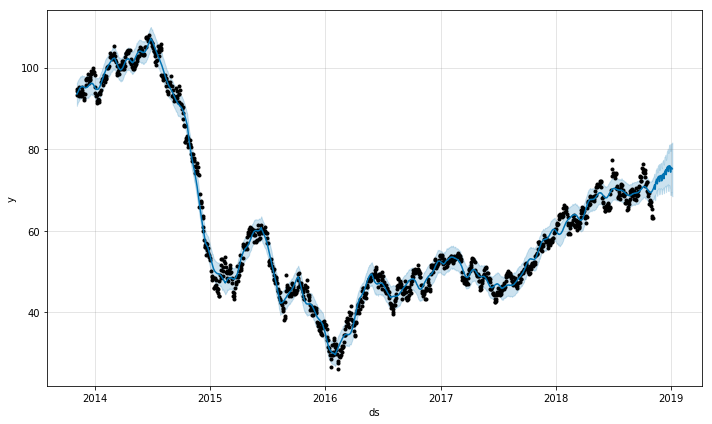

In [220]:
figure = model.plot(forecast_data)

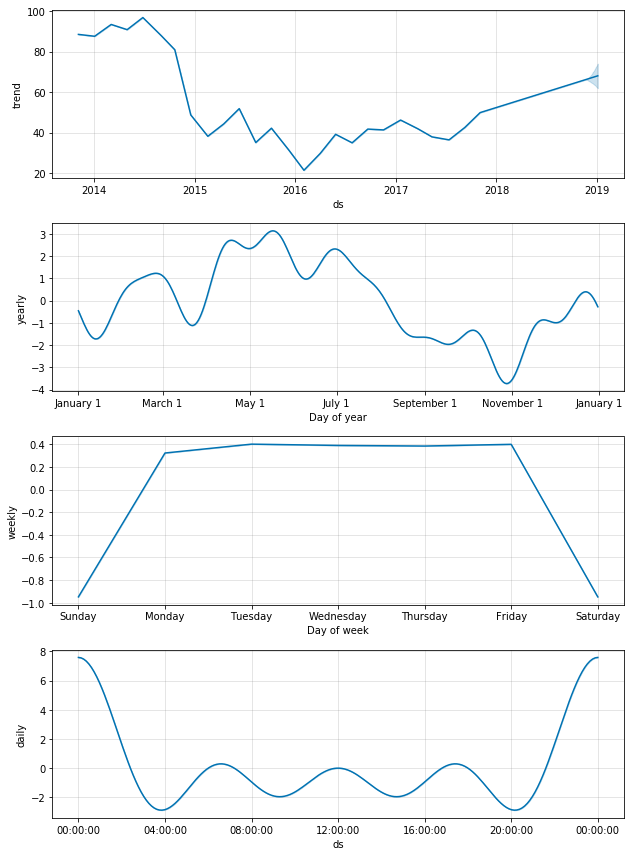

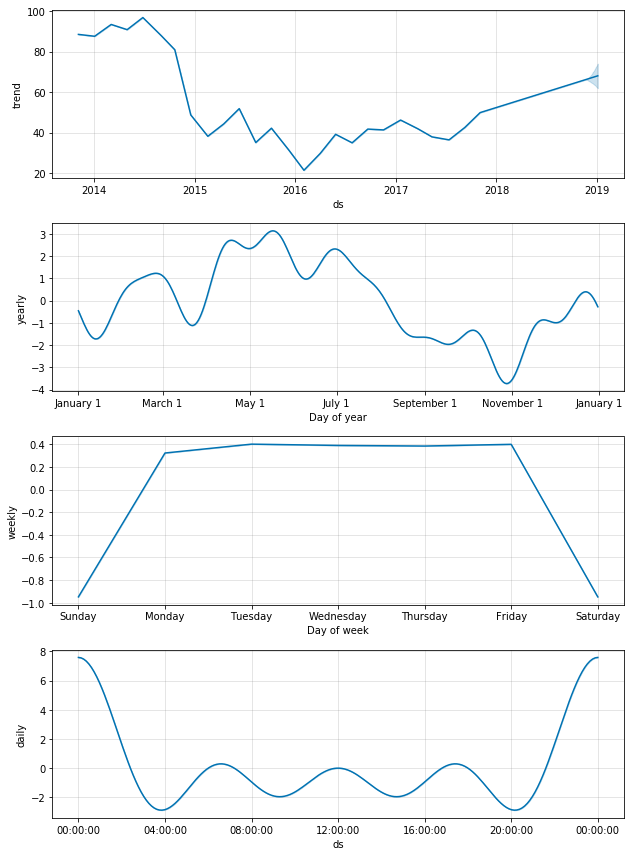

In [221]:
model.plot_components(forecast_data)

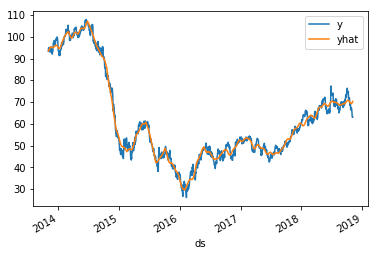

In [222]:
#Make it more visible to catch where model is off. The current model is good at predicting long term trends.. Not so much daily.
current = forecast_data.merge(df, on="ds", how="left")
current= current.dropna()
current= current.set_index('ds')
current[["y", "yhat"]].plot()


Text(0.5, 0, 'Date')

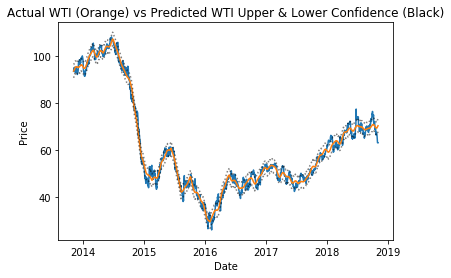

In [223]:
fig, ax1 = plt.subplots()
ax1.plot(current.y)
ax1.plot(current.yhat)
ax1.plot(current.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(current.yhat_lower, color='black',  linestyle=':', alpha=0.5)
 
ax1.set_title('Actual WTI (Orange) vs Predicted WTI Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')